In [10]:
%pip install seaborn
%pip install pandas
%pip install numpy
%pip install matplotlib


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Prepocesing data

In [54]:
# Load the dataset
df = pd.read_excel('oasis_longitudinal_demographics.xlsx')


In [55]:
print("Tota Rows and Columns (Rows,Columns) : ",df.shape)
df.head(5)

Tota Rows and Columns (Rows,Columns) :  (373, 15)


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    float64
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(6), int64(4), object(5)
memory usage: 43.8+ KB


In [57]:

df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

karena terdapat null value maka dilakuka imputation data dengan memasukkan nilai mean dan median

In [58]:
#fill null value with their column mean and median
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13792\4112089332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SES"].fillna(df["SES"].median(), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_13792\4112089332.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [59]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [60]:
print("jumlah duplikasi data :", df.duplicated().sum())

jumlah duplikasi data : 0


In [118]:
df.describe()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.0,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,73.343164,186.000000,0.490617,0.882038,57.608579,0.428954,0.0,17.013405,5.611260,1.436997,15.058981,0.573727,184.611260,186.000000,185.388740
std,43.625116,107.820066,0.500583,0.922843,65.120625,0.495592,0.0,7.640957,2.590633,1.109307,3.834865,0.716965,107.089283,107.820066,107.089283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,93.000000,0.000000,0.000000,0.000000,0.000000,0.0,11.000000,3.000000,1.000000,14.000000,0.000000,93.000000,93.000000,93.000000
50%,71.000000,186.000000,0.000000,1.000000,29.000000,0.000000,0.0,17.000000,6.000000,1.000000,17.000000,0.000000,184.000000,186.000000,186.000000
75%,111.000000,279.000000,1.000000,1.000000,110.000000,1.000000,0.0,22.000000,7.000000,2.000000,18.000000,1.000000,277.000000,279.000000,277.000000
max,149.000000,372.000000,1.000000,4.000000,200.000000,1.000000,0.0,38.000000,11.000000,4.000000,18.000000,3.000000,370.000000,372.000000,370.000000


# EDA (Exploratory Data Analysis)

<Axes: xlabel='Group', ylabel='count'>

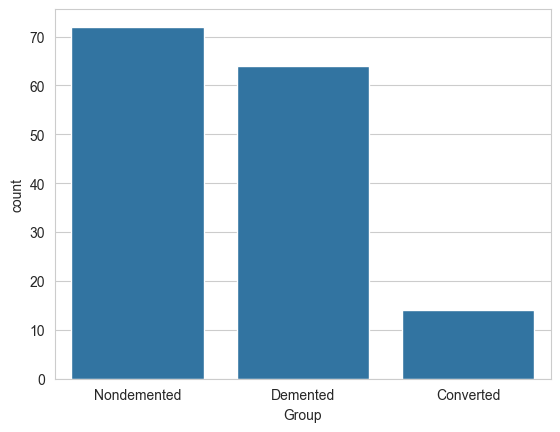

In [61]:
#see how many people have Alzheimer
#same person visits two or more time so only take the single visit data
sns.set_style("whitegrid")
ex_df = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=ex_df)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13792\2144647112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])


<Axes: xlabel='Group', ylabel='count'>

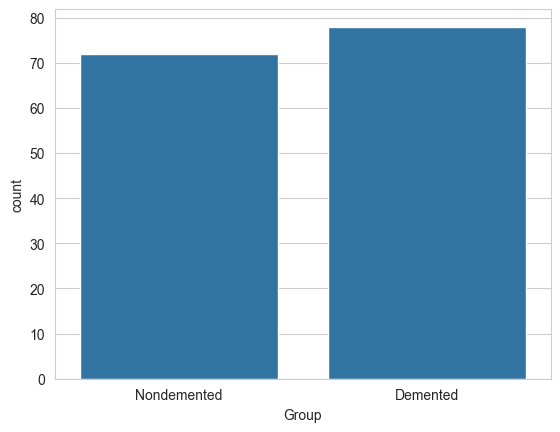

In [62]:
#We have three groups so convert Converted Group Into Demented

ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=ex_df)

In [63]:
# bar drawing function
def bar_chart(feature):
    Demented = ex_df[ex_df['Group']=='Demented'][feature].value_counts()
    Nondemented = ex_df[ex_df['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)

M/F           M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

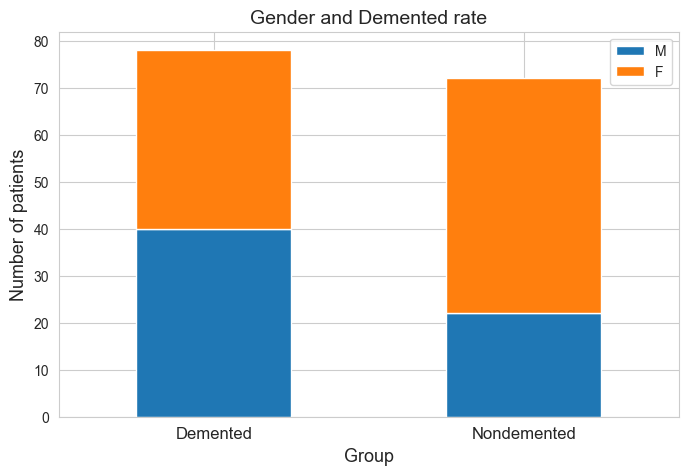

In [64]:
# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

In [65]:
#convet the charecter data into numeric
group_map = {"Demented": 1, "Nondemented": 0}

df['Group'] = df['Group'].map(group_map)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

C:\Users\Asus\AppData\Local\Temp\ipykernel_13792\855724519.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['M/F'] = df['M/F'].replace(['F','M'], [0,1])


<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

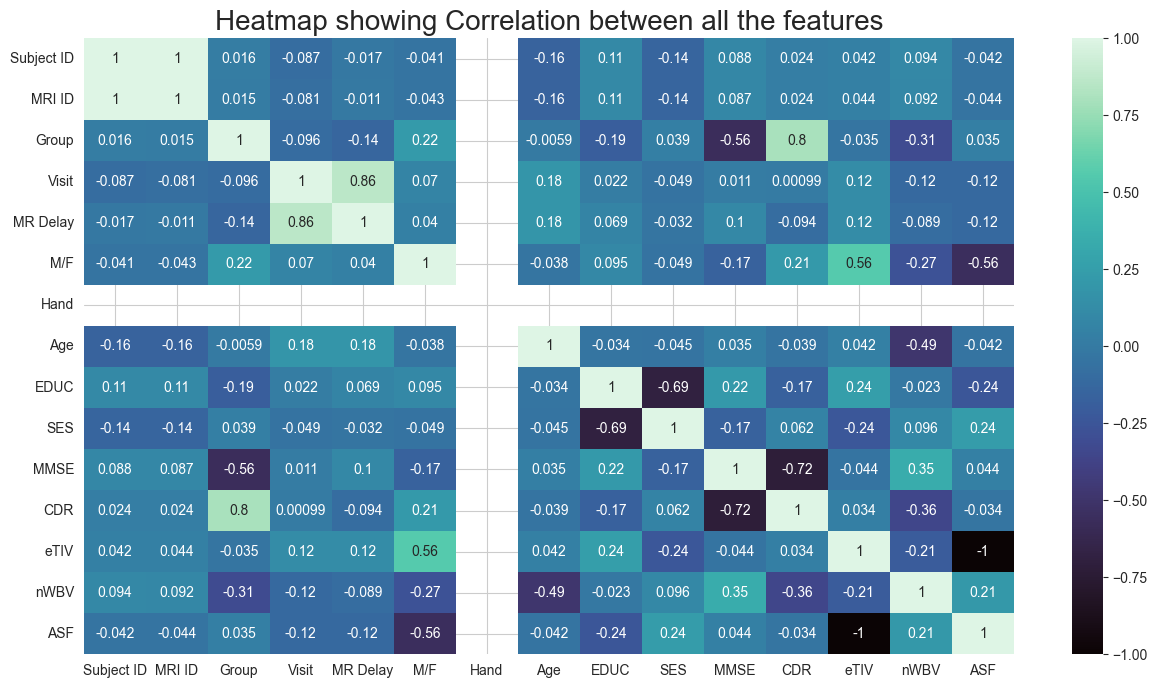

In [72]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df.corr(),annot = True, cmap='mako')

In [99]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Subject ID  373 non-null    int64
 1   MRI ID      373 non-null    int64
 2   Group       373 non-null    int64
 3   Visit       373 non-null    int64
 4   MR Delay    373 non-null    int64
 5   M/F         373 non-null    int64
 6   Hand        373 non-null    int64
 7   Age         373 non-null    int64
 8   EDUC        373 non-null    int64
 9   SES         373 non-null    int64
 10  MMSE        373 non-null    int64
 11  CDR         373 non-null    int64
 12  eTIV        373 non-null    int64
 13  nWBV        373 non-null    int64
 14  ASF         373 non-null    int64
dtypes: int64(15)
memory usage: 43.8 KB


# Train Model

In [101]:
from sklearn.model_selection import train_test_split

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



In [102]:
# Apply SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.634


d:\kuliah\Semester 6\ML\Tugas 2 SVM\svm_c\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

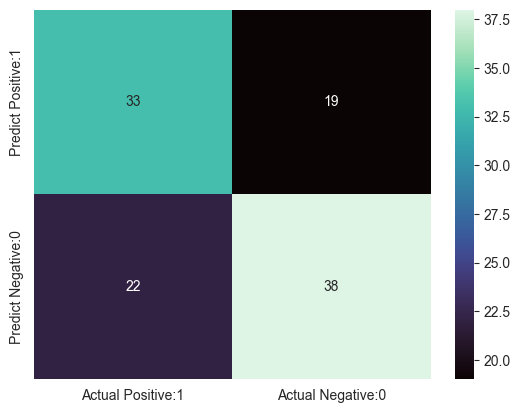

In [103]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [104]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62        52
           1       0.67      0.63      0.65        60

    accuracy                           0.63       112
   macro avg       0.63      0.63      0.63       112
weighted avg       0.64      0.63      0.63       112



# SVM Kernel Functions

## Linear Kernel

In [107]:
# Apply SVM model using Linear Kernel function 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
linear_classifier=SVC(kernel='linear').fit(X_train,y_train)
y_pred = linear_classifier.predict(X_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

d:\kuliah\Semester 6\ML\Tugas 2 SVM\svm_c\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy with linear kernel : 0.741


<Axes: >

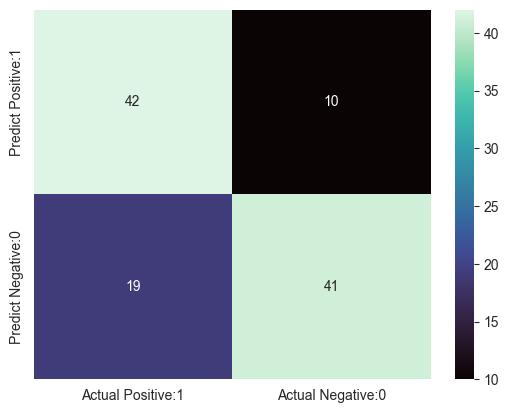

In [108]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [109]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74        52
           1       0.80      0.68      0.74        60

    accuracy                           0.74       112
   macro avg       0.75      0.75      0.74       112
weighted avg       0.75      0.74      0.74       112



## Gaussian RBF kernel

In [111]:
# Apply SVM model using Polynomial Kernel function
Poly_svc=SVC(kernel='poly', C=1).fit(X_train,y_train)
y_pred = Poly_svc.predict(X_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.598


d:\kuliah\Semester 6\ML\Tugas 2 SVM\svm_c\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

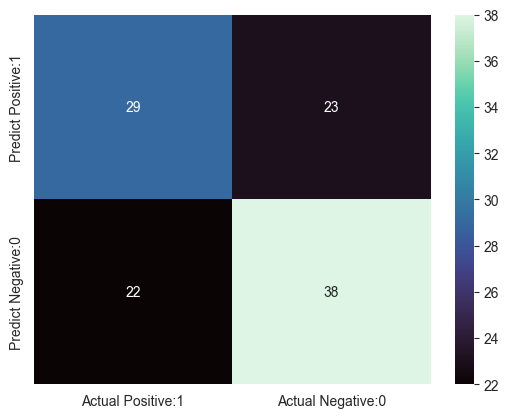

In [112]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [113]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56        52
           1       0.62      0.63      0.63        60

    accuracy                           0.60       112
   macro avg       0.60      0.60      0.60       112
weighted avg       0.60      0.60      0.60       112



## Polynomial Kernel

In [115]:
# Apply SVM model using Polynomial Kernel function
Poly_svc=SVC(kernel='poly', C=1).fit(X_train,y_train)
y_pred = Poly_svc.predict(X_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.598


d:\kuliah\Semester 6\ML\Tugas 2 SVM\svm_c\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

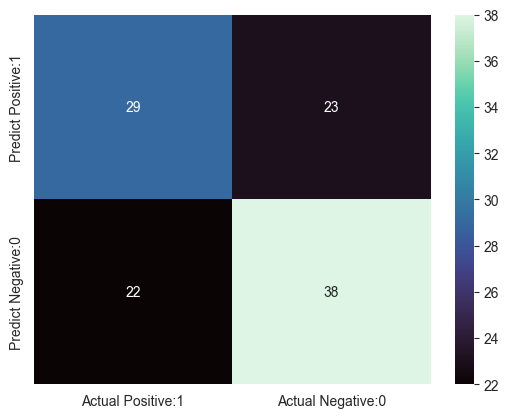

In [116]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [117]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56        52
           1       0.62      0.63      0.63        60

    accuracy                           0.60       112
   macro avg       0.60      0.60      0.60       112
weighted avg       0.60      0.60      0.60       112



## kesimpulan

Model yang paling akurat adalah model svm linear kernel dengan akurasi : 74,1 %